# Visualizations

## Importing Libraries

In [2]:
import pandas as pd
from plotnine import *
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

## Import Data

In [3]:
data1 = pd.read_csv('../data/cleaned/unicef_indicator_1_cleaned.csv')
data2 = pd.read_csv('../data/cleaned/unicef_inidcator_2_cleaned.csv')


In [4]:
data1.head()

,Country,alpha_2_code,alpha_3_code,numeric_code,Indicator,Year,Value,Gender,observation_status,current_age
0,Afghanistan,AF,AFG,4,Percentage of overweight among children aged 5...,2022,21.980000,Total,Modelled,Total
1,Albania,AL,ALB,8,Percentage of overweight among children aged 5...,2022,22.500000,Total,Modelled,Total
2,Algeria,DZ,DZA,12,Percentage of overweight among children aged 5...,2022,31.950001,Total,Modelled,Total
3,American Samoa,AS,ASM,16,Percentage of overweight among children aged 5...,2022,54.959999,Total,Modelled,Total
4,Andorra,AD,AND,20,Percentage of overweight among children aged 5...,2022,28.500000,Total,Modelled,Total


In [5]:
data2.head()

,Country,alpha_2_code,alpha_3_code,numeric_code,Indicator,Year,Value,Gender,observation_status,current_age
0,Afghanistan,AF,AFG,4,Percentage of children who received the 2nd do...,2004,2,Total,Estimated value,Total
1,Afghanistan,AF,AFG,4,Percentage of children who received the 2nd do...,2005,9,Total,Estimated value,Total
2,Afghanistan,AF,AFG,4,Percentage of children who received the 2nd do...,2006,18,Total,Estimated value,Total
3,Afghanistan,AF,AFG,4,Percentage of children who received the 2nd do...,2007,4,Total,Estimated value,Total
4,Afghanistan,AF,AFG,4,Percentage of children who received the 2nd do...,2008,23,Total,Estimated value,Total


## World Map

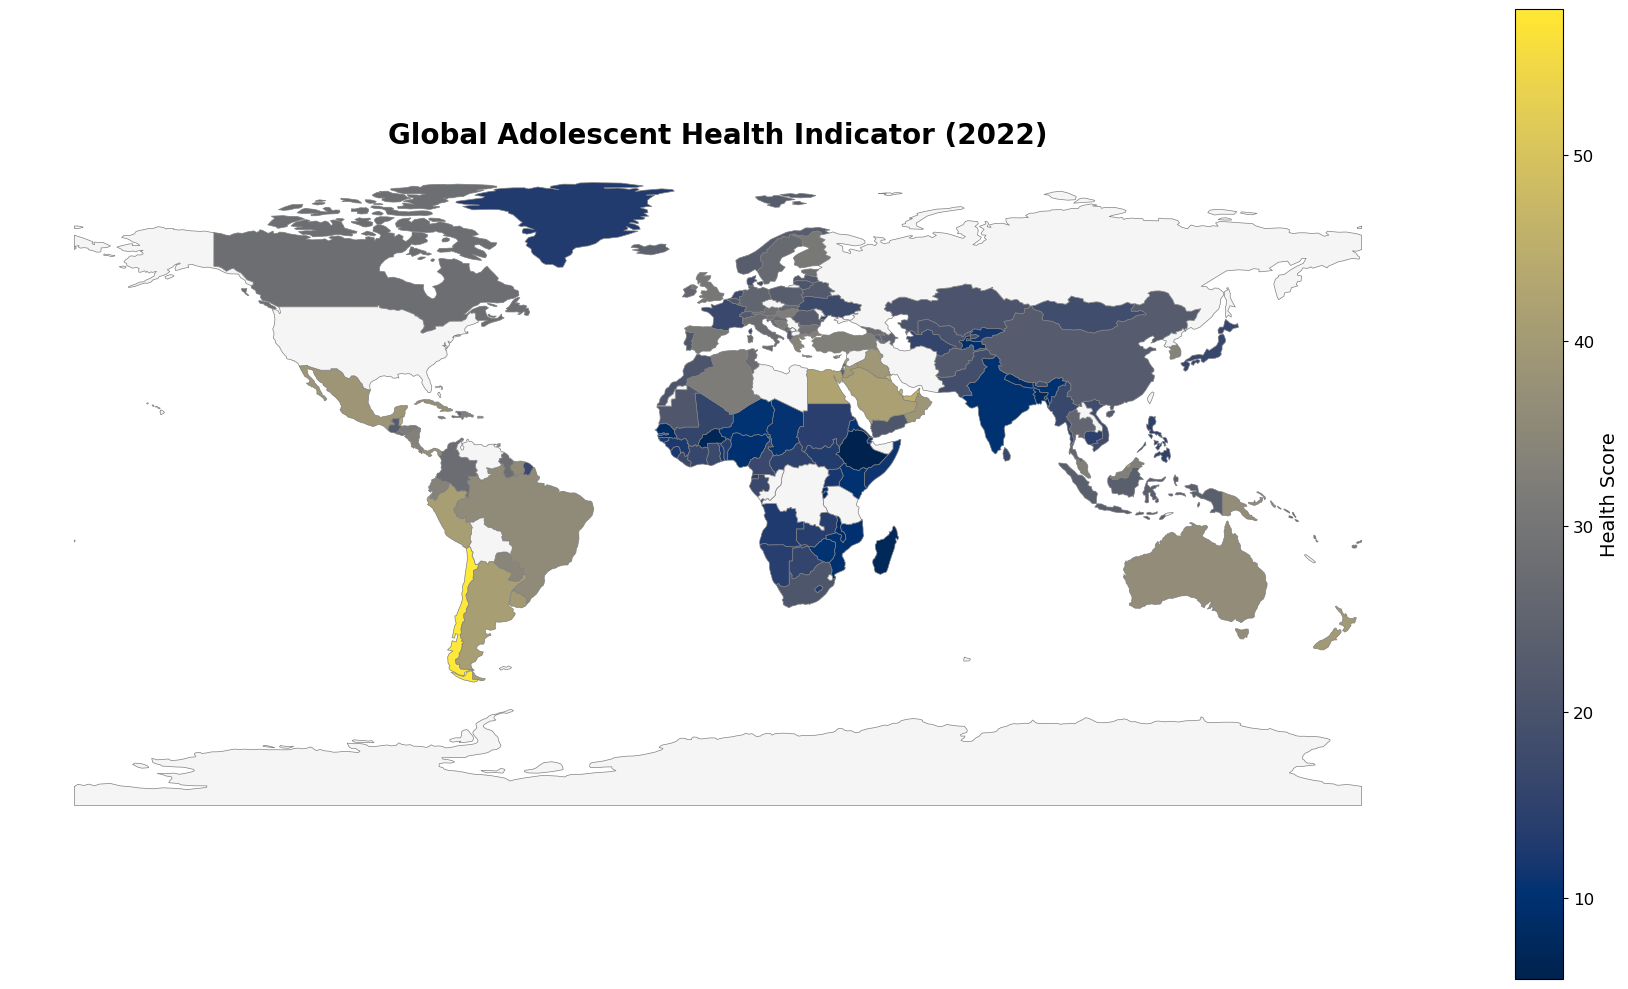

In [24]:
world = gpd.read_file("../data/shapefiles/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

map_df = df1[(df1["Gender"] == "Total") & (df1["Year"] == 2022)]
world = world.rename(columns={"ADMIN": "Country"})

merged = world.merge(map_df, on="Country", how="left")

# Plot
fig, ax = plt.subplots(figsize=(18, 10))

plot = merged.plot(
    column="Value",
    cmap="cividis",               
    linewidth=0.5,
    edgecolor="grey",
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "whitesmoke",
        "label": "No data"
    }
)

ax.set_title("Global Adolescent Health Indicator (2022)", fontsize=20, fontweight="bold")
ax.axis("off")

colorbar = plot.get_figure().get_axes()[1]
colorbar.set_ylabel("Health Score", fontsize=14)
colorbar.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

## Line Chart

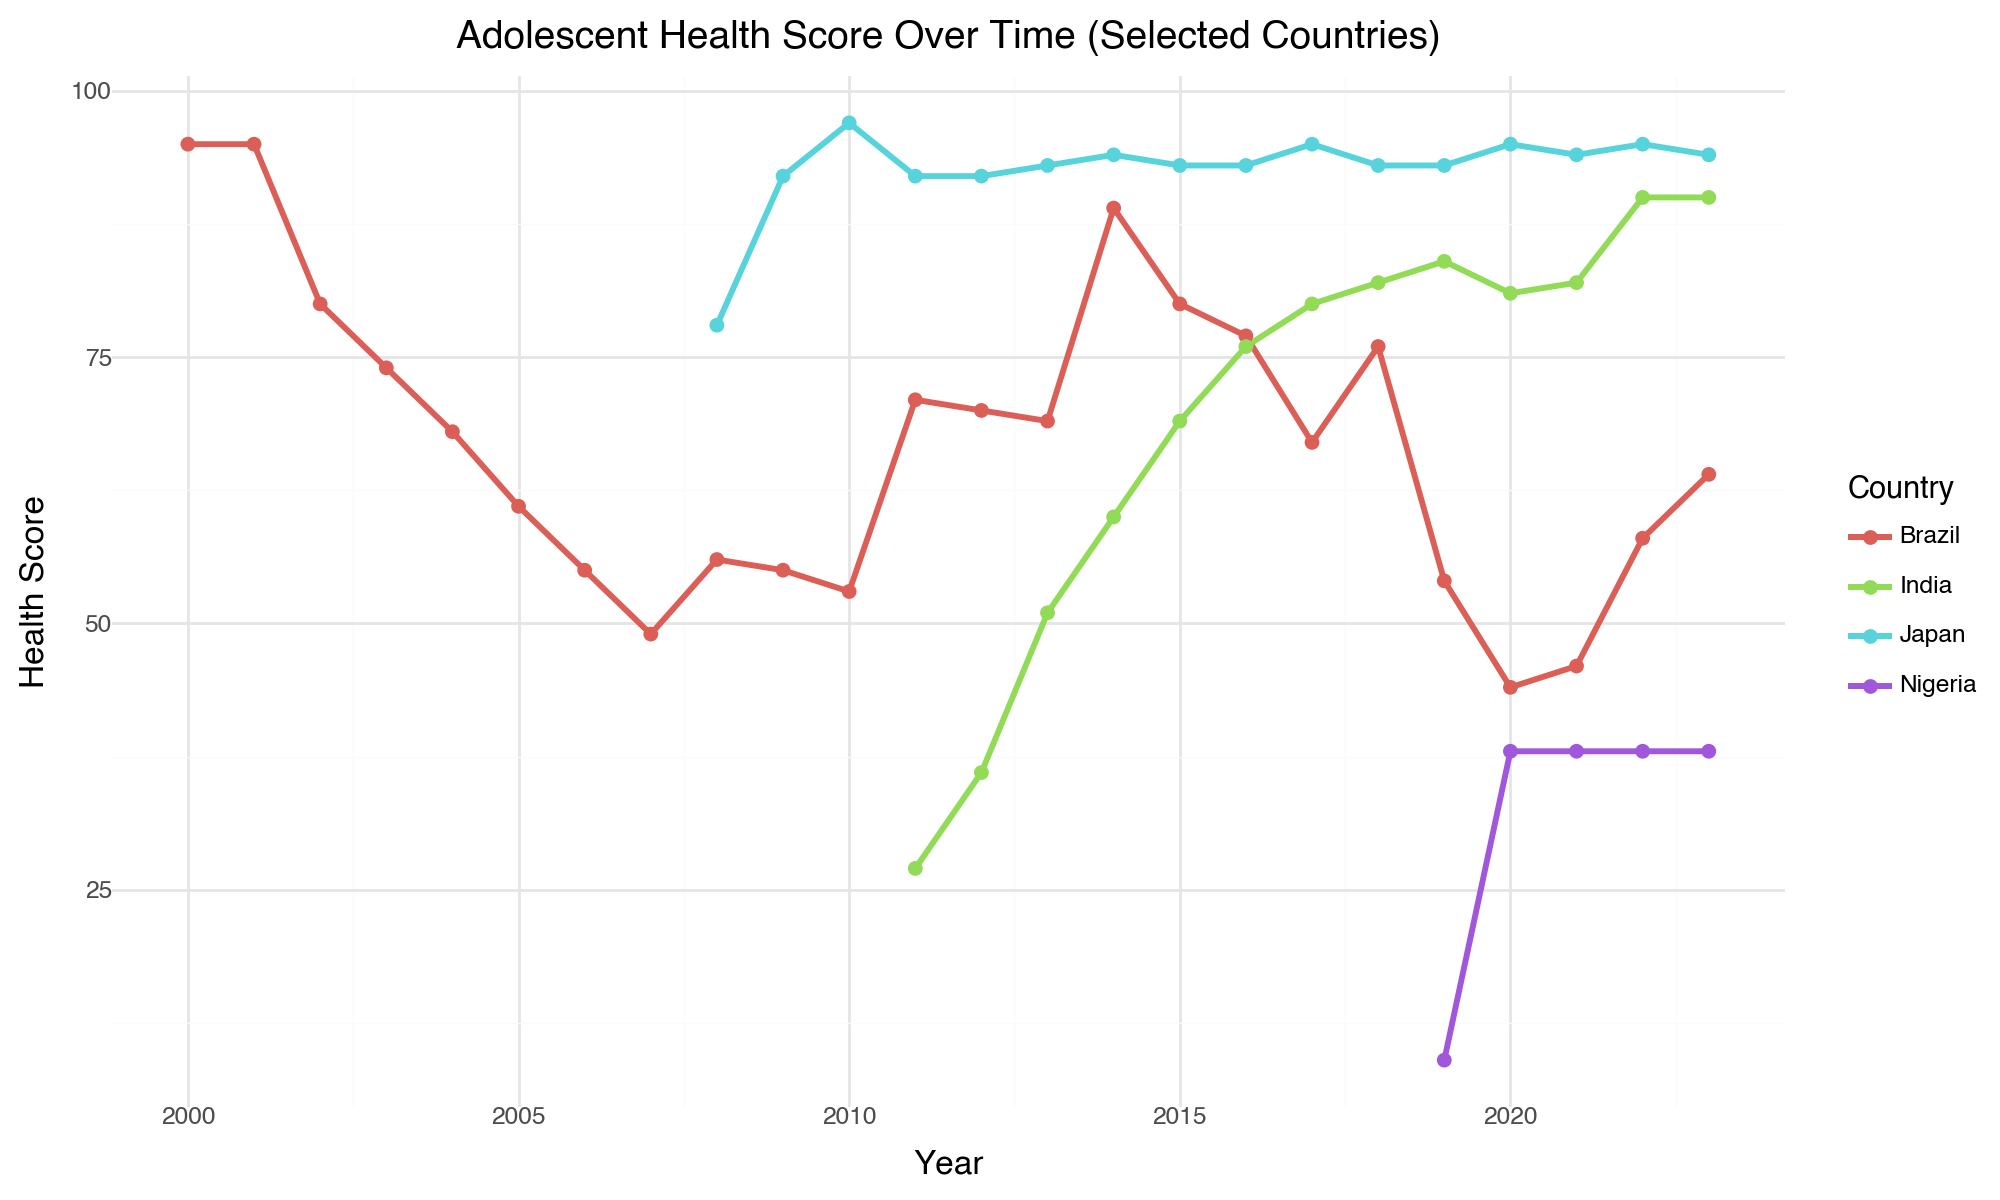

In [36]:
df_line = data2[(data2['Gender'] == 'Total') & (data2['Country'].isin(['Japan', 'Brazil', 'India', 'Nigeria']))]

# Plot
line_plot = (
    ggplot(df_line, aes(x='Year', y='Value', color='Country')) +
    geom_line(size=1.2) +
    geom_point(size=2) +
    labs(
        title='Adolescent Health Score Over Time (Selected Countries)',
        x='Year', y='Health Score'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        plot_title=element_text(size=14, weight='bold'),
        axis_title=element_text(size=12)
    )
)
line_plot

## Bar Graph

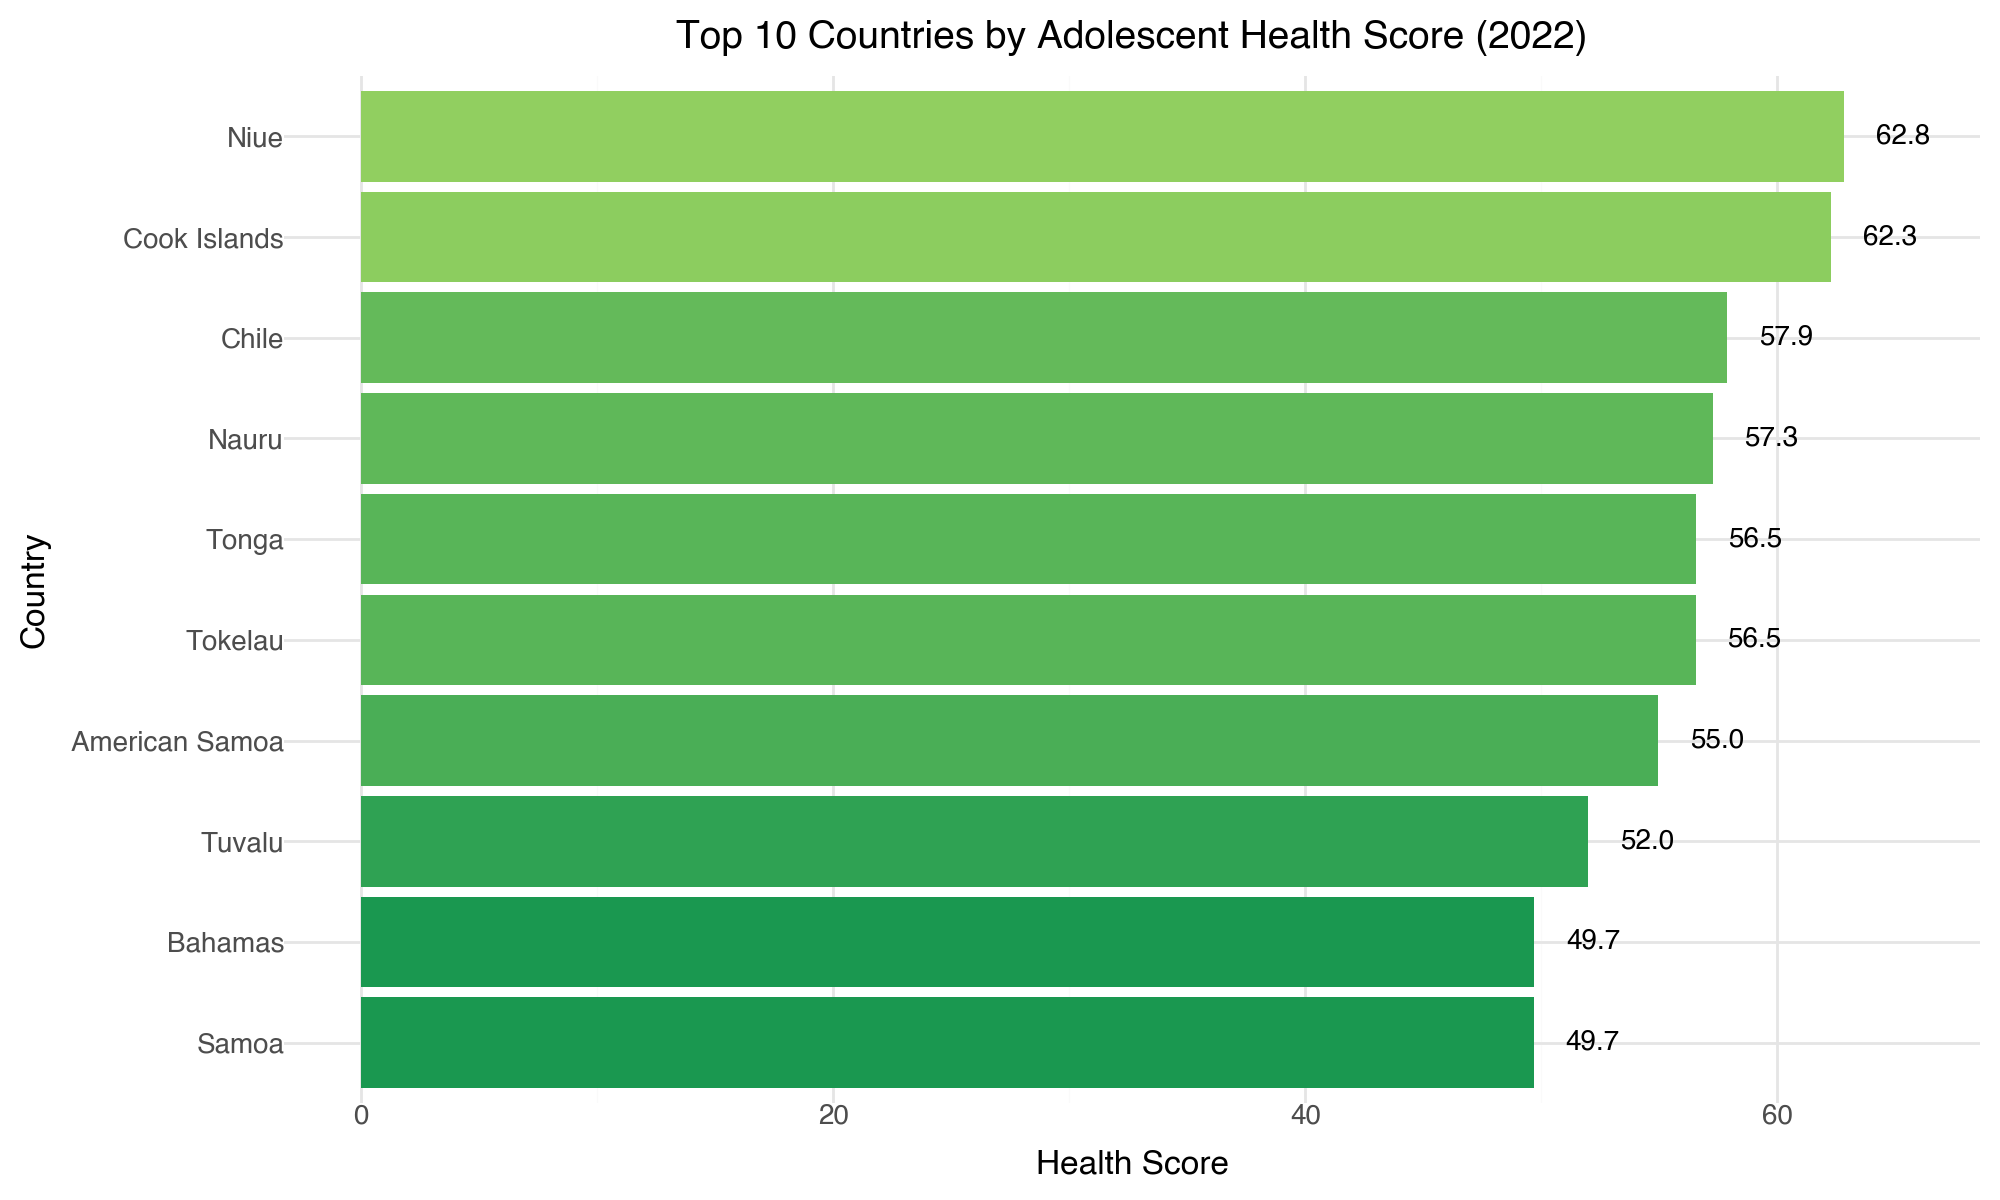

In [43]:
df_bar = data1[(data1['Gender'] == 'Total') & (data1['Year'] == 2022)].dropna(subset=['Value'])

top10 = df_bar.sort_values(by='Value', ascending=False).head(10)
top10['Country'] = pd.Categorical(top10['Country'], categories=top10.sort_values('Value')['Country'], ordered=True)

bar_plot = (
    ggplot(top10, aes(x='Country', y='Value', fill='Value')) +
    geom_col(show_legend=False) +
    geom_text(aes(label='round(Value, 1)'), nudge_y=2.5, size=10, format_string='{:.1f}') +
    labs(
        title='Top 10 Countries by Adolescent Health Score (2022)',
        x='Country', y='Health Score'
    ) +
    scale_fill_gradient(low="#1a9850", high="#91cf60") +
    coord_flip() +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        plot_title=element_text(size=14, weight='bold'),
        axis_title=element_text(size=12),
        axis_text=element_text(size=10)
    )
)
bar_plot


## Scatterplot Linear Regression Line

/var/folders/ln/8s8rnz7s3pv6jwy7khy_32yw0000gn/T/ipykernel_97054/635461030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/var/folders/ln/8s8rnz7s3pv6jwy7khy_32yw0000gn/T/ipykernel_97054/635461030.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


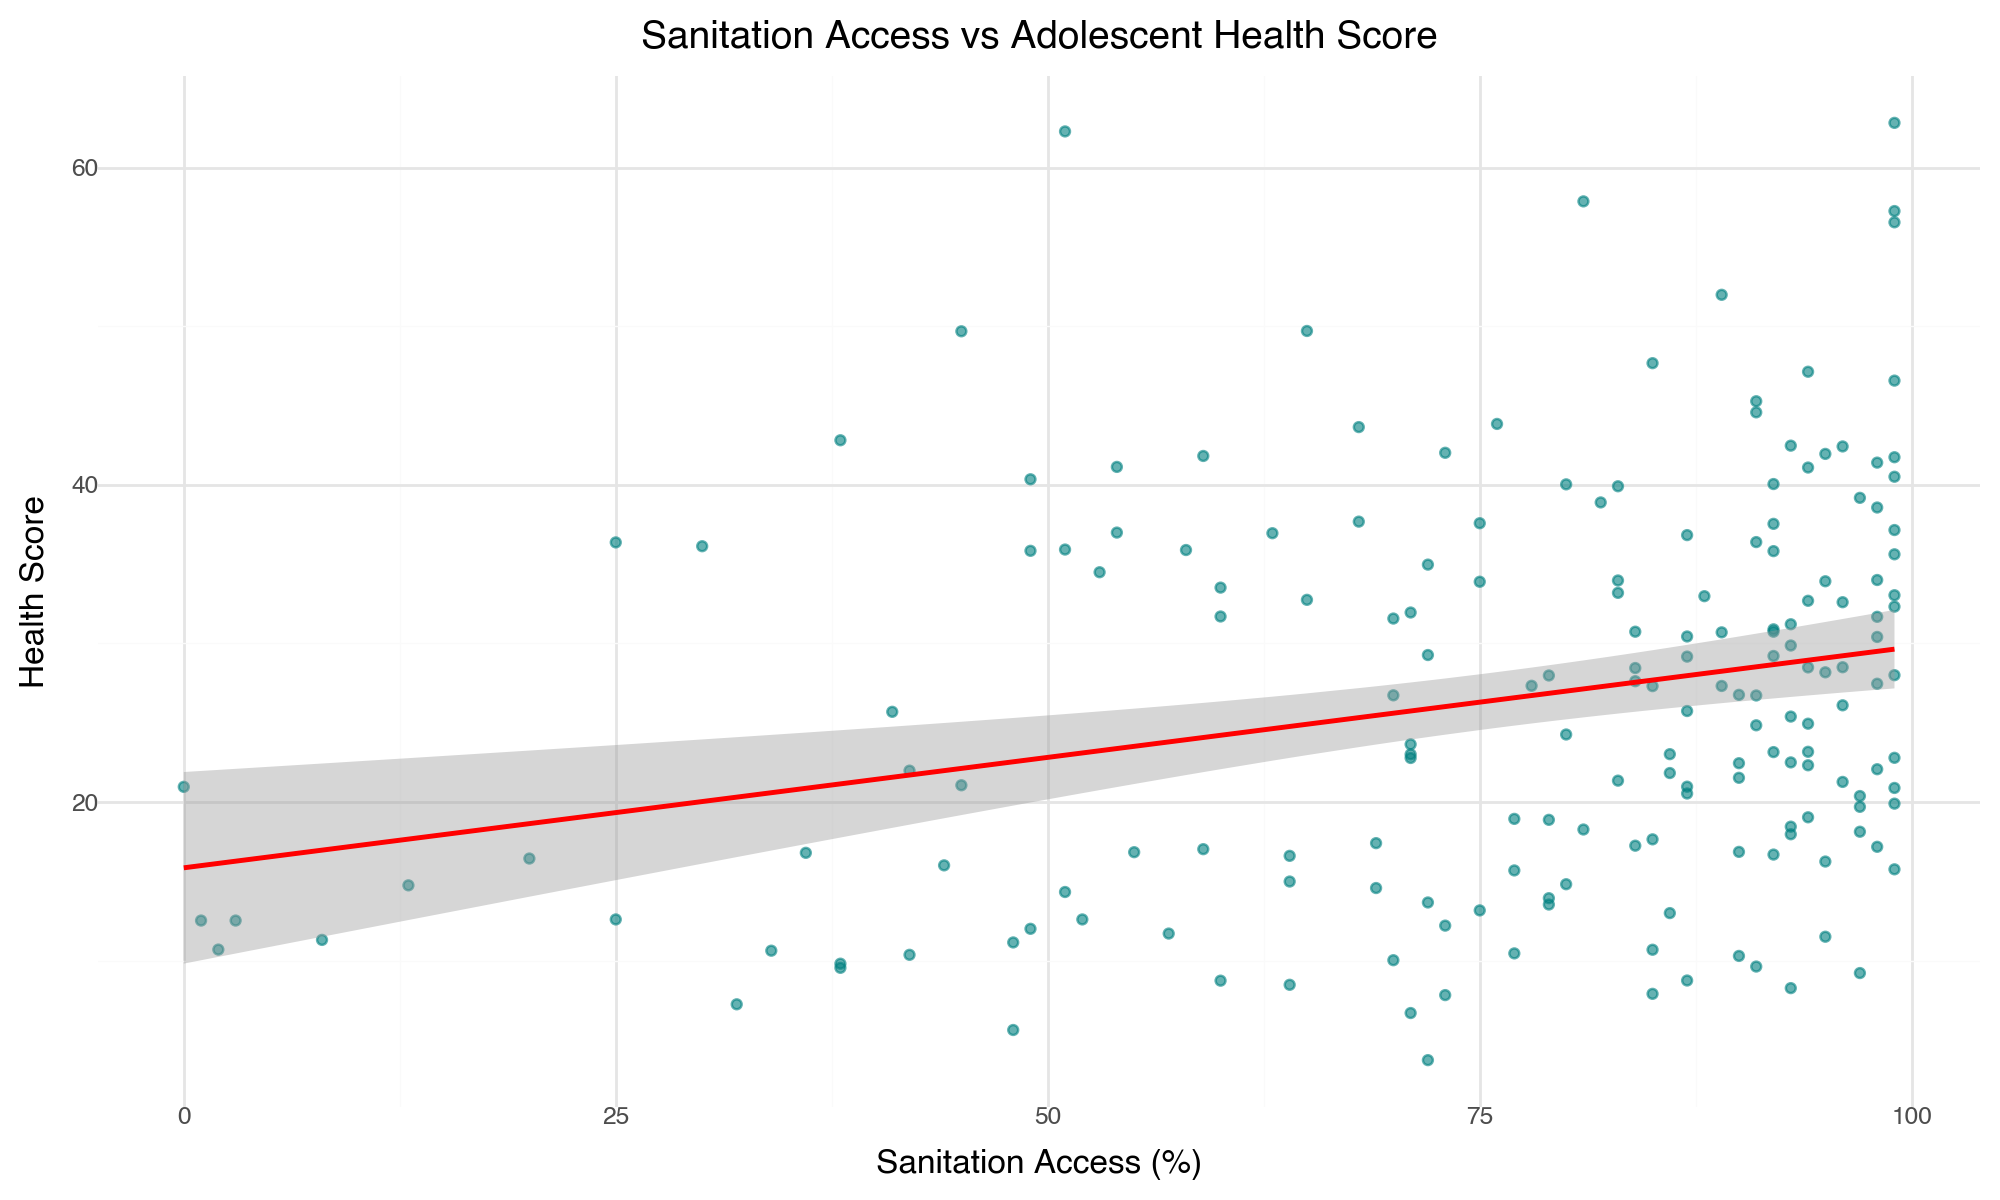

In [44]:
data1 = data1[data2['Gender'] == 'Total']
data1 = data1[data2['Gender'] == 'Total']

merged = data1.merge(data2, on=['Country', 'Year'], suffixes=('_health', '_sanitation'))
merged = merged.dropna(subset=['Value_health', 'Value_sanitation'])

scatter_plot = (
    ggplot(merged, aes(x='Value_sanitation', y='Value_health')) +
    geom_point(alpha=0.6, color='teal') +
    geom_smooth(method='lm', color='red') +
    labs(
        title='Sanitation Access vs Adolescent Health Score',
        x='Sanitation Access (%)', y='Health Score'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        plot_title=element_text(size=14, weight='bold'),
        axis_title=element_text(size=12)
    )
)
scatter_plot